In [1]:
# Necessary imports
import sklearn as sk
from sklearn import svm
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import seaborn as sns
import numpy as np
import pandas as pd
import pickle

%matplotlib inline
import matplotlib.pyplot as plt



## Table of Contents

- [Problem Statement](#Problem-Statement)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Read CSV](#Read-CSV)
- [Data Pre-Processing](#Data-Pre-Processing)
    - [Clean Data](#Clean-Data)
    - [Reducing Dimentionality of Data](#Reducing-Dimentionality-of-Data)
    - [Reducing Outliers from Data](#Removing-outliers-from-Data)
    - [Get Training and Testing Set](#Get-Training-and-Testing-Set)
- [Data Visalization](#Data-Visalization)
- [Train a Model](#Train-a-Model)
    - [Create a Model](#Create-a-Model)
    - [Fit the Model](#Fit-the-Model)
    - [Test the Model](#Test-the-Model)
- [Save the Model](#Save-the-Model)




# Problem Statement

We have collected some health vitals that can be used to predict if the patient will acquire a coronary heart disease in the next 10 years, we can call these data points as X. For the collected samples we have the ground truth stating that whether the corresponding case acquired that disease in the next 10 years or not, we can call this data pointer Y. We now want to train a model that can take in those data points (X) and predict whether that case is vulnerable to acquire a coronary Heart disease (ŷ). We can apply this model on any other patient and classify him as vulnerable to that disease or not, doing so will help us take necessary steps in advance.

## Exploratory Data Analysis

In this step we would read the dataset and try to understand our data, we would usually start with checking the dataypes and data ranges.


## Read CSV

We would be using pandas library to read the CSV and clean the data to be used in the next step.

In [2]:
df = pd.read_csv('Problem2_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [4]:
df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


Column 0 is ID column and can be excluded from training data, 

Columns 0 to -2 or IV to A22 are vitals which will be used to train the model for the corresponding Y values in the Column -1 or Traget is column which contains the classification ground truth. 


In [5]:
for i, col in enumerate(df.columns):
    opt = f"""
        {1}. {col} column has a min: {df[col].min():0.2f}, mean: {df[col].mean():0.2f}, max: {df[col].max():0.2f}, std: {df[col].std():0.2f}  
    """.strip()
    print(opt)

1. ID column has a min: 1058628.00, mean: 1979837.87, max: 3274754.00, std: 638485.49
1. IV column has a min: -2999.00, mean: 236.25, max: 366924.00, std: 3326.57
1. A1 column has a min: 0.00, mean: 36.13, max: 50547.00, std: 427.71
1. A2 column has a min: 0.00, mean: 7.36, max: 52.00, std: 6.17
1. A3 column has a min: 0.00, mean: 22.54, max: 31750.00, std: 359.49
1. A4 column has a min: 0.00, mean: 1.70, max: 2999.00, std: 36.20
1. A5 column has a min: 0.00, mean: 151.96, max: 260660.00, std: 2274.09
1. A6 column has a min: 0.00, mean: 274.42, max: 438020.00, std: 4065.44
1. A7 column has a min: 0.00, mean: 387.93, max: 533540.00, std: 5443.80
1. A8 column has a min: 0.00, mean: 36.48, max: 21071.00, std: 375.93
1. A9 column has a min: 0.00, mean: 132.95, max: 742110.00, std: 4151.80
1. A10 column has a min: 0.00, mean: 236.65, max: 742750.00, std: 4528.96
1. A11 column has a min: 27.00, mean: 27.00, max: 27.00, std: 0.00
1. A12 column has a min: 0.00, mean: 341.15, max: 743215.00, st

In [4]:
df.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


Looking at the above data we got some interesting insights, 

- some columns like IV has negative values, 
- column A15 and A16 has -99 values which can be invalid values, or no data values.
- Target column has 33% positive samples and 77% negative samples.
- Column A13, A18 have very less STD there can be very less information in those columns



----------------------------------------------------------------------------------------

# Data Pre-Processing

In this step we would like to read the data and understand format of data and prepare it in a format that can be used to train the model. Our model is as good as our data and I am a believer of 70:30 ratio 70% of my model is data and 30% is the architecture or algorithm. Anyway, better algorithm is always good but my point is we should be very careful while preparing our dataset to avoid pitfalls.

## Clean Data

At this step we would be cleaning our data by filling the invalid values with means in case of float or drop the row in case of int datatype.

### Check if there are NAs

In [5]:
(df.isna() | df.isin([-99, -999])).values.astype(int).sum()


6079

 As we can see our dataset is having invalid values lets clean them up.

### Handle Invalid values in Float datatype columns

for columns with datatype float we would fill averages in place of NAs, -999, -99, ' '

In [6]:
# X in column 1 to -2 and Y in column -1 and ID col 0 is not needed in model training

for col in df.iloc[:, 1:-1].columns: 
    if df[col].dtype in [np.float64, np.float32]:
        fill_idx = df[col].isna() | df[col].isin([-99, -999, ' '])
        fill_val = df.loc[~fill_idx, col].mean()
        df.loc[fill_idx, col] = fill_val
        size = df.loc[fill_idx, col].size
        print(f"-- filled {size} rows in {col} column with mean value {fill_val}")


-- filled 1743 rows in A2 column with mean value 7.355184707111685
-- filled 2233 rows in A15 column with mean value 0.7549572516225662
-- filled 2103 rows in A16 column with mean value 0.7504633600596681
-- filled 0 rows in A21 column with mean value 17.049825959760508


### Handle Invalid Values in Int datatype columns

for columns with datatype int we would simple drop the row, also we noted that none of the int columns are having invalid values we are doing this just to be safe

In [7]:
flt_idx = (df.iloc[:, 1:].isna() | df.isin([-999, -99, '']) ).any(axis=1)
df = df[~flt_idx]

In [8]:
# Drop index to allow dataframe to adjust the dropped the dropped rows to index
df.reset_index(drop=True, inplace=True)

### Re Check if there are NAs

In [9]:
(df.isna() | df.isin([-99, -999, ''])).values.astype(int).sum()


0

There are no invalid values left

## Reducing Dimentionality of Data

we will check for the most important parameters and try to remove duplciates. This helps reducing redundant parameters.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = df[~(df < 0)]
df.dropna(inplace=True)
array = df.values
X = array[:,1:24]
Y = array[:,24]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.915e+06 9.278e+04 2.634e+03 2.365e+05 6.657e+03 1.071e+04 1.453e+05
 3.193e+05 4.976e+04 5.045e+05 9.140e+05 0.000e+00 1.209e+06 5.942e+01
 2.293e+04 4.438e+01 4.203e+01 8.934e+01 8.819e+00 6.812e+01 2.146e-02
 4.959e-05 3.179e+00]
[[2.049e+03 1.230e+02 2.300e+02 3.300e+02]
 [4.800e+01 1.000e+00 1.000e+00 1.000e+00]
 [3.180e+02 1.000e+00 2.000e+00 2.000e+00]
 [6.200e+01 2.400e+01 4.200e+01 7.100e+01]
 [2.000e+00 0.000e+00 2.000e+00 2.000e+00]]


In [11]:
df_flt = df[['IV', 'A9', 'A10', 'A12', 'Target']]
df_flt.head()

,IV,A9,A10,A12,Target
0,2049.0,123,230,330,0
1,48.0,1,1,1,0
2,318.0,1,2,2,0
3,62.0,24,42,71,0
4,2.0,0,2,2,0


In [12]:
df_flt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33310 entries, 0 to 34280
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV      33310 non-null  float64
 1   A9      33310 non-null  int64  
 2   A10     33310 non-null  int64  
 3   A12     33310 non-null  int64  
 4   Target  33310 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


In [13]:
df_flt.describe()

,IV,A9,A10,A12,Target
count,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000
mean,244.590513,128.824437,229.920174,331.861153,0.312309
std,3374.175071,4208.590754,4585.344015,5063.785523,0.463442
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.000000,5.000000,7.000000,0.000000
75%,43.000000,18.000000,34.000000,49.750000,1.000000
max,366924.000000,742110.000000,742750.000000,743215.000000,1.000000


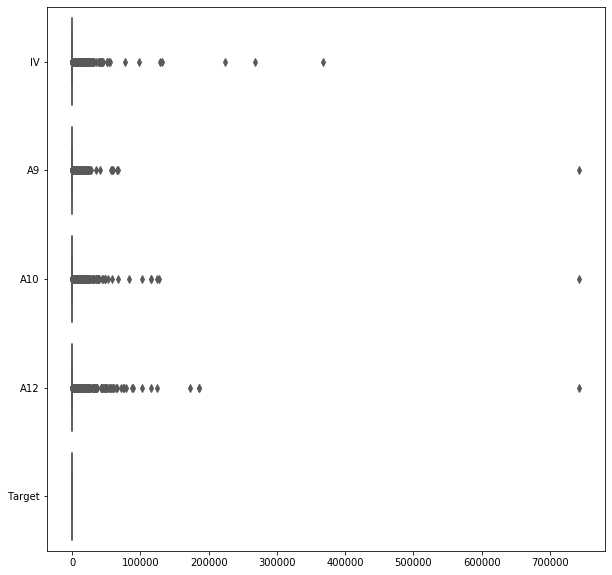

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_flt,orient="h", palette="Set2")

## Reducing Outliers from Data

In [15]:
def remove_outlier_by_mean_value(df, col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].mean()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in, axis=1, inplace=True)
    df[col_in] = y

In [16]:
for i in df_flt.columns:
    remove_outlier_by_mean_value(df_flt, i)

C:\Users\san10428\.conda\envs\ml\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\san10428\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


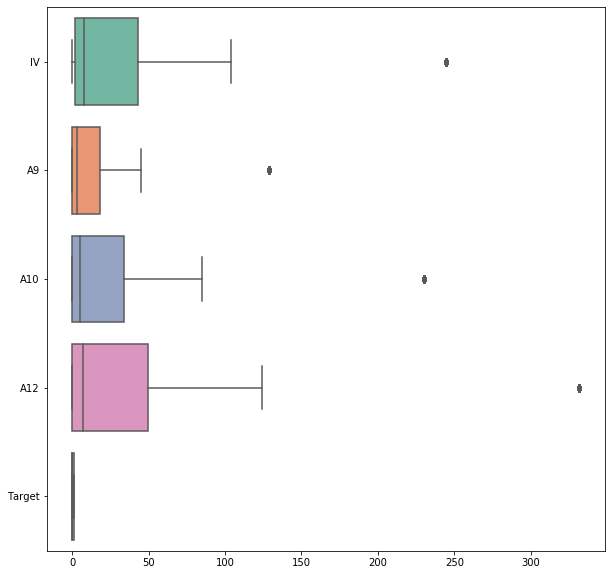

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_flt, orient="h", palette="Set2")

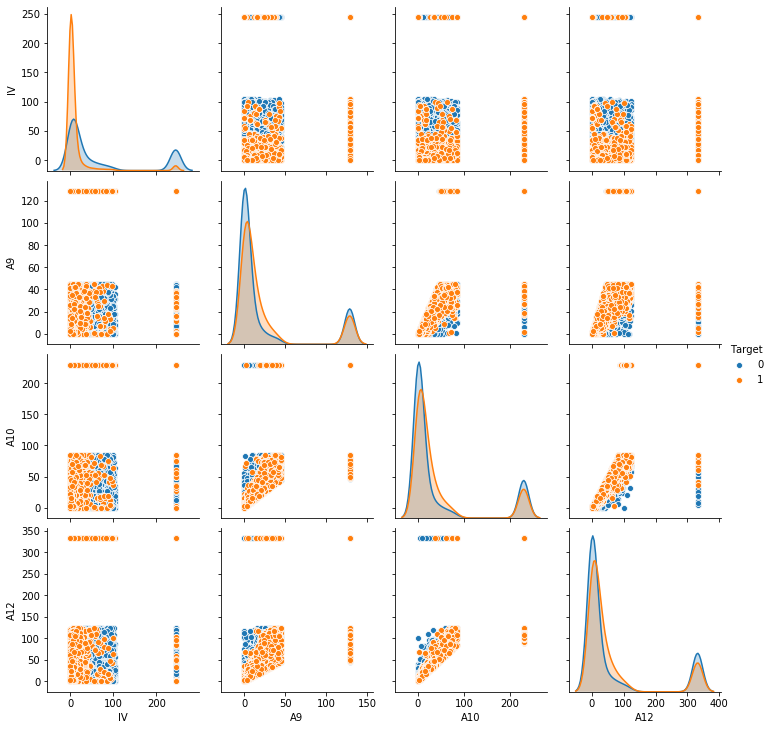

In [18]:
sns.pairplot(df_flt, hue='Target')

## Data Normalization

In [19]:
scaler = Normalizer().fit(df.drop('Target', axis=1))
standarized_x = scaler.transform(df.drop('Target', axis=1))

## Get Training and Testing Set

Selection of training and testing set is done to check our model’s performance on unseen data usually the accuracy which we print for our model is derived on validation set only (I am pronouncing our testing set as validation set here). W9e would like to keep 80% of our total data as training set and remaining 20% as our validation set (testing set). We cannot simply keep aside 80% and 20% set, the validation set should reflect as a reduced or thinned down version of training set. We used sklearn’s `train_test_split()` function to split our data frame to training and testing set.

In [20]:
# We want to split data -> test 80% and train 20%
X_train, X_test, y_train, y_test = train_test_split(standarized_x, df.Target, test_size=0.2)

In [21]:
X_train.size/df.size, X_test.size/df.size

(0.768, 0.192)

----------------------------------------------------------------------


# Train a Model

## Create a Model

In [22]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100)

In [23]:
# Support Vector Machine model
svm_model = svm.LinearSVC(max_iter=2000)

In [39]:
y_pred = model.predict(X_test)

In [41]:
print(accuracy_score(y_test, y_pred))

0.8937256079255479


In [42]:
print(confusion_matrix(y_test,y_pred))

[[4299  338]
 [ 370 1655]]


## Fit the Model

In [24]:
# Random Forest Model
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# Support Vector Machine model
svm_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Test the Model

In [26]:
# Random Forest Model
rf_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
# Support Vector Machine model
svm_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluate Model Performance

In [43]:
# Support Vector Machine model
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.6796757730411288

 [[4528    0]
 [2134    0]]


In [44]:
# Random Forest Model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.8989792854998498

 [[4224  304]
 [ 369 1765]]


## Suggest ways of improving the model


The model can be further improved with more data and a better algorithm that can handle biased data. Also, if we apply focal loss over these types of problem, we would get better results.




## Any interesting observations
This problem is so simple that even without any tricks we were able to achieve 80% accuracy, these seems to be directly coming from the Bayes theory. The dataset is having a smaller number of positive samples which further makes our model bias towards predicting fewer positive samples. Even if we have a testing set, to test the robustness of our model needs to be tested with a different dataset with different number of positive over negative samples.



## Challenges faced and how you mitigated the challenges

We initially used an SVM and did not normalize our data, we fed the data as it is inside the model, doing this we were able to get an accuracy of 80%. Then we started experimenting with the data pipeline and hyperparameters. We started with reducing the no of parameters by checking for the most important ones, then we normalized the dataset and finally we used a random forest classifier. With each of these changes we were able to improve our model accuracy to nearly 90%.


## Assumptions if any
No, I am not aware of.

## Save the Model

In [46]:
model_name = 'trained_model_SVM.pkl'
with open(model_name, 'wb') as f:
    pickle.dump(svm_model, f)

In [47]:
model_name = 'trained_model_RF.pkl'
with open(model_name, 'wb') as f:
    pickle.dump(rf_model, f)